In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#Importing bases

db_gender = pd.read_csv("gender_submission.csv")
db_train = pd.read_csv("train.csv")

In [4]:
db_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Briefly understanding the dataset

In [5]:
db_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
db_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**The heatmap is a great tool to visually the nullgaps in the dataset and quickly acess it** 

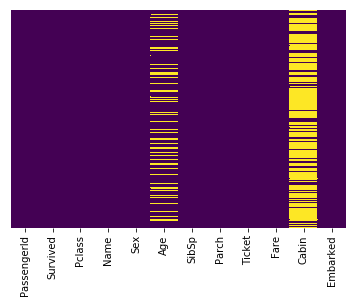

In [7]:
sns.heatmap(db_train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [8]:
db_train = db_train.drop("Cabin",1)

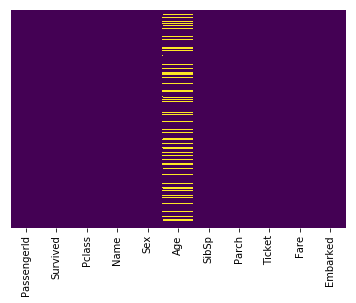

In [9]:
sns.heatmap(db_train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**Whats the % of blank value in the "Age" Column?**

In [10]:
number = db_train['Age'].count()
total_values = len(db_train['Age'])

print(number/total_values)

0.801346801347


~80% pretty trustworthy

ok to not drop this column and replace empty values with some other value

**How to fill in the blank the Age value?**

My line of thought is figure out the data that have the highest correlation with Age. In order to do so, I created a heatmap and came to a conclusion that Pclass have the highest correlation. Let's double click in this variable

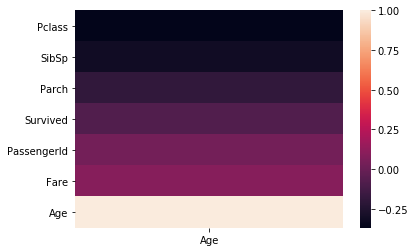

In [11]:
sns.heatmap(db_train.corr()[['Age']].sort_values(by = 'Age'))

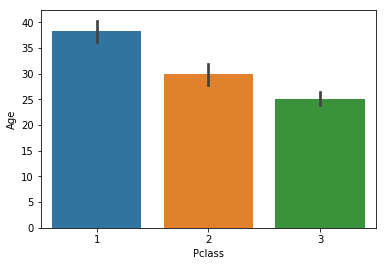

In [12]:
sns.barplot(x = "Pclass",y = "Age", data = db_train)

**I would say that its fair enought to replace the null value in 'Age' with the average age of each Pclass. With that in mind, I am calculating the average age per class and inputing this value in the 'Age'column accordingly with its class**

In [13]:
#Calculating the average por class

#Pclass = 3
db_avg_pclass3 = db_train[db_train['Pclass'] == 3]
median3 = db_avg_pclass3['Age'].mean()

#Pclass = 2
db_avg_pclass2 = db_train[db_train['Pclass'] == 2]
median2 = db_avg_pclass2['Age'].mean()

#Pclass = 1
db_avg_pclass1 = db_train[db_train['Pclass'] == 1]
median1 = db_avg_pclass1['Age'].mean()

print('median Pclass 3 = ',median3)
print('median Pclass 2 = ',median2)
print('median Pclass 1 = ',median1)


median Pclass 3 =  25.14061971830986
median Pclass 2 =  29.87763005780347
median Pclass 1 =  38.233440860215055


In [14]:
def input_value (cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    
    else:
        return Age

In [15]:
db_train['Age'] = db_train[['Age', 'Pclass']].apply(input_value, axis = 1)

In [16]:
db_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


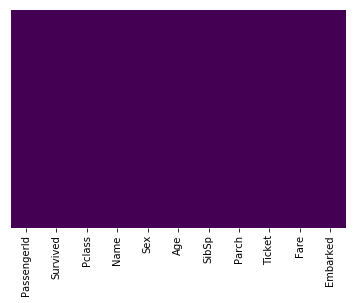

In [17]:
sns.heatmap(db_train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

# Ok, now the data is clean. Let's try to find a few correlactions

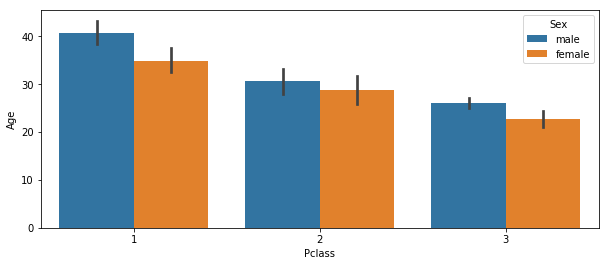

In [18]:
pylab.rcParams['figure.figsize'] = (10, 4)
sns.barplot(x = 'Pclass', y = 'Age', data = db_train, hue = 'Sex')

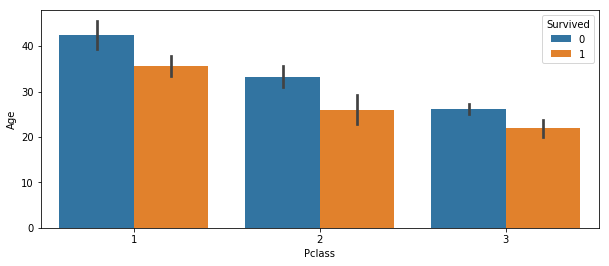

In [19]:
sns.barplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = db_train)

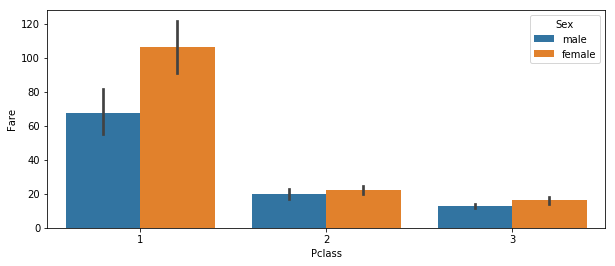

In [20]:
pylab.rcParams['figure.figsize'] = (10, 4)
sns.barplot(x = 'Pclass', y = 'Fare', data = db_train, hue = 'Sex')

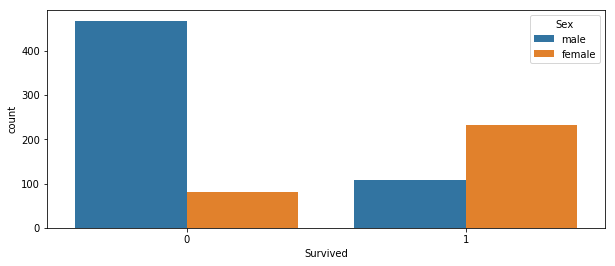

In [21]:
sns.countplot(x = 'Survived', hue = 'Sex', data = db_train)

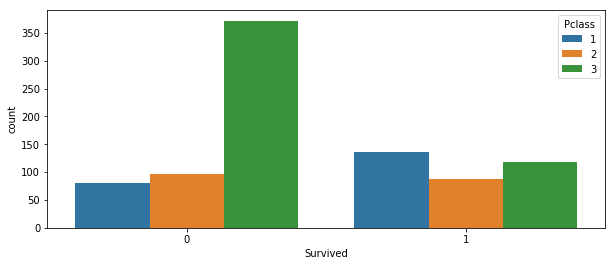

In [22]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = db_train)

**Age distribution for entire Titanic**

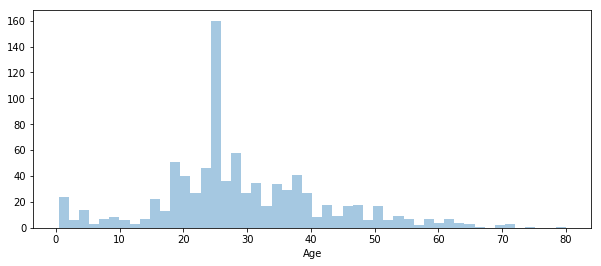

In [23]:
sns.distplot(db_train['Age'], kde = False, bins = 50)

**Age distribution for the ones who survived**

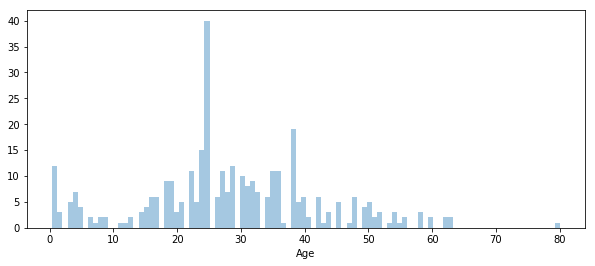

In [24]:
sns.distplot(db_train[db_train['Survived'] == 1]['Age'], kde = False, bins = 100)

**Age distribution for the ones who DID NOT survived**

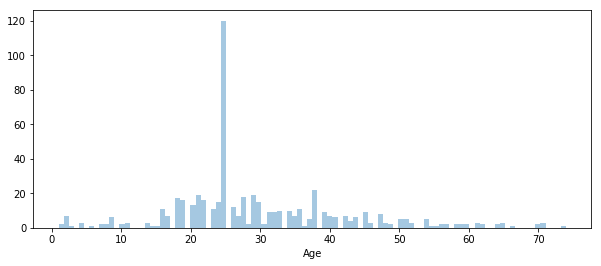

In [25]:
sns.distplot(db_train[db_train['Survived'] == 0]['Age'], kde = False, bins = 100)

# Good to go. Let's start with modeling

**Preparing the dataset**

In order to use train the model with our dataset, Its very important that the dataset has (as a general rule) numerical values. For that, it is importante to notice that some columns have categorical values and others have strings (which we are not going to use by now)

- Categorical Columns:
The values in this columns represent a category: Male / Female, iPhone / Android, low / medium / high.
For this values, we can use the get_dummies method from pandas and transform them into (boolean) values


- String Columns:
For now, we are not using strings values as an input for the model. So we choose to simply drop the columns

In [26]:
db_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


**Using get_dummies method to work on categorical values**

In [27]:
sex = pd.get_dummies(db_train['Sex']).drop('female', axis = 1)

In [28]:
embark = pd.get_dummies(db_train['Embarked']).drop('C',axis = 1)

In [29]:
train = pd.concat([db_train, sex, embark], axis = 1)

In [30]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0


**Droping columns that we are not using (for now)**

In [31]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [32]:
train.drop(['PassengerId', 'Name', 'Sex','Ticket','Embarked'],axis = 1, inplace=True)

In [33]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,25.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


# Using sklearn logistic regression model

**Remember: Y is the value we want to predict**

In [34]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

**Importing train test split**

In [35]:
from sklearn.cross_validation import train_test_split

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Importing the model**

In [37]:
from sklearn.linear_model import LogisticRegression

Instanciating

In [38]:
logmodel = LogisticRegression()

Trainning

In [39]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predicting

In [40]:
predictions = logmodel.predict(X_test)

**Evaluating the model**

In [41]:
from sklearn.metrics import classification_report

---

This is the report using Pclass **WITHOUT** the get_dummies method and spliting the trainning data with test_split

In [42]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       157
          1       0.80      0.71      0.75       111

avg / total       0.81      0.81      0.80       268



In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test, predictions)

array([[137,  20],
       [ 32,  79]])

---

# Optimizing precision with LogRegression - 1 attempt

**Let's see how is the LogisticRegression accuracy switching the Pclass values with get_dummies methods**

In [45]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,25.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


**Using the get_dummies to transform Pclass column and preparing the dataset**

In [46]:
pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [47]:
train_pclass = pd.concat([train,pclass],axis = 1)

In [48]:
train_pclass.drop('Pclass', axis = 1, inplace=True)

In [49]:
train_pclass

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
5,0,25.0,0,0,8.4583,1,1,0,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0


**Spliting the data**

In [50]:
X_pclass = train_pclass.drop('Survived', axis = 1)
y_pclass = train_pclass['Survived']

In [51]:
X_train_pclass, X_test_pclass, y_train_pclass, y_test_pclass = train_test_split(X_pclass, y_pclass, test_size=0.30, random_state=42)

**Trainning model**

Instanciating

In [52]:
logmodel2 = LogisticRegression()

Trainning

In [53]:
logmodel2.fit(X_train_pclass,y_train_pclass)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
predictions_pclass = logmodel2.predict(X_test_pclass)

---

**Evaluating model**

Separating Pclass values in columns (using get_dummies method)

In [55]:
print(classification_report(y_test_pclass, predictions_pclass))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       157
          1       0.80      0.70      0.75       111

avg / total       0.80      0.80      0.80       268



Pclass with its original value

In [56]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       157
          1       0.80      0.71      0.75       111

avg / total       0.81      0.81      0.80       268



**It seems that there isn't much variation between the two methods. Using Pclass original value returns a slightly higher (0.01%) precision. So I'll stick with this one**

---

# Let's work with the entire data

In [57]:
db_test = pd.read_csv('test.csv')

**Now we have to make the same changes that we did on the very first dataset. So they can be comparable**

**1 - Do some cleaning on this dataset**

**2 - Work on categorical values on Sex and Embarked columns**

**3 - Drop few columns not used for the model**

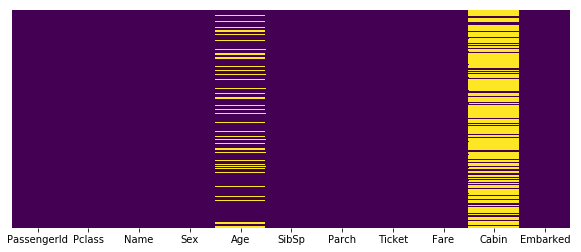

In [58]:
sns.heatmap(db_test.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

Pretty much the same cenarium as the trainning dataset. Cabin columns with several blank values and a few null values for the age

In [59]:
db_test.drop('Cabin', axis = 1, inplace=True)

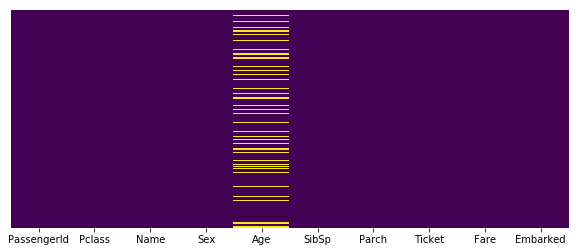

In [60]:
sns.heatmap(db_test.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

Getting the mean age per class and replacing the null values with it

In [61]:
print('mean age for passanger in class 3: ',db_test[db_test['Pclass'] == 3]['Age'].mean())
print('')
print('mean age for passanger in class 2: ',db_test[db_test['Pclass'] == 2]['Age'].mean())
print('')
print('mean age for passanger in class 1: ',db_test[db_test['Pclass'] == 1]['Age'].mean())

mean age for passanger in class 3:  24.02794520547945

mean age for passanger in class 2:  28.7775

mean age for passanger in class 1:  40.91836734693877


Using the same function that I defined previously - but with new mean values

In [62]:
def input_value_test (cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 40
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [63]:
db_test['Age'] = db_test[['Age', 'Pclass']].apply(input_value_test, axis = 1)

**Good to go!**

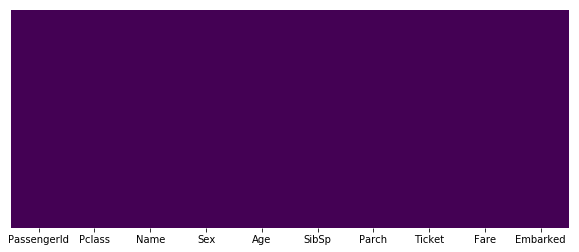

In [64]:
sns.heatmap(db_test.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**2 - Work on categorical values on Sex and Embarked columns**


In [65]:
len(db_test)

418

In [66]:
sex_test = pd.get_dummies(db_test['Sex']).drop('female',axis = 1)

In [67]:
embarked_test = pd.get_dummies(db_test['Embarked']).drop('C',axis = 1)

In [68]:
test = pd.concat([db_test,sex_test,embarked_test],axis = 1)

**3 - Drop few columns not used for the model**

In [69]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,1,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S,1,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C,0,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S,1,0,1


In [70]:
test.drop(['PassengerId','Name','Sex','Embarked','Ticket'],axis = 1, inplace=True)

# Using LogisticRegression

**1 - Spliting dataset (not going to do with the entire dataset available)**

**2 - fitting/trainning model and do predictions**

**3 - compare results with classification report**

Instante

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logmodel_all = LogisticRegression()

Trainning

In [73]:
X_train_data_all = train.drop('Survived', axis = 1)
y_train_data_all = train['Survived']

In [74]:
logmodel_all.fit(X_train_data_all,y_train_data_all)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
np.any(np.isnan(test['Fare']))

True

In [76]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [77]:
test.fillna('35',inplace=True)

In [84]:
prediction_all = logmodel_all.predict(test)

**Cool! Job done! Now we have to upload to Kaggle and see the results!**

In [85]:
prediction_all

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [88]:
result = pd.DataFrame()
result['PassengerId'] = db_test['PassengerId']
result['Predictions'] = pd.Series(prediction_all)
result.set_index('PassengerId', inplace = True)

In [89]:
result

,Predictions
PassengerId,
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1


In [ ]:
result.to_csv('result_titanic.csv')

# Using KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [102]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [103]:
predictions_knn = knn.predict(X_test)

In [104]:
from sklearn.metrics import classification_report

In [105]:
confusion_matrix(y_test, predictions_knn)

array([[123,  34],
       [ 50,  61]])

In [106]:
print(classification_report(y_test,predictions_knn))

             precision    recall  f1-score   support

          0       0.71      0.78      0.75       157
          1       0.64      0.55      0.59       111

avg / total       0.68      0.69      0.68       268



Worst result so far. But we are using K = 1. Let's figure out the best value for k

In [107]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)        #instaciating
    knn.fit(X_train,y_train)                         #fitting
    pred_i = knn.predict(X_test)                     #predicting
    error_rate.append(np.mean(pred_i != y_test))     # creating a vector with

Text(0,0.5,'Error Rate')

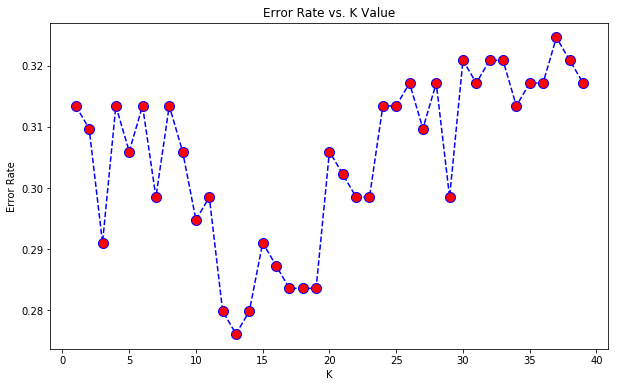

In [108]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [109]:
knn = KNeighborsClassifier(n_neighbors = 14)

In [110]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

In [111]:
predictions_knn = knn.predict(X_test)

In [112]:
print(classification_report(y_test, predictions_knn))

             precision    recall  f1-score   support

          0       0.70      0.90      0.79       157
          1       0.76      0.47      0.58       111

avg / total       0.73      0.72      0.70       268



**We used the intire trainning dataset to figure out the best value for K. We are assuming that 14 is the best value. Now we are going to apply k = 14 to the entire training dataset and upload to Kaggle the results**

**I realized that 73% accuracy with k=14 for KNN is less then the result we got with Logisti Regressino model. But it is worth it to try anyway and check out the results**

In [113]:
knn.fit(X_train_data_all,y_train_data_all)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

In [114]:
predictions_knn_alldata = knn.predict(test)

In [115]:
predictions_knn_alldata

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0,

In [116]:
result_knn = pd.DataFrame()
result_knn['PassengerId'] = db_test['PassengerId']
result_knn['Survived'] = predictions_knn_alldata
result_knn.set_index('PassengerId',inplace=True)
result_knn

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
897,0
898,0
899,1
900,0


In [ ]:
result_knn.to_csv('result_knn_titanic.csv')

# Comparing results

**Logistic Regression**

In [117]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       157
          1       0.80      0.71      0.75       111

avg / total       0.81      0.81      0.80       268



**KNN**

In [118]:
print(classification_report(y_test, predictions_knn))

             precision    recall  f1-score   support

          0       0.70      0.90      0.79       157
          1       0.76      0.47      0.58       111

avg / total       0.73      0.72      0.70       268



# Better to move forward with the Logistic Regression model